# Training Post Data Trial 1 

In [1]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install gensim

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../../processedDataset/preprocessedPostData.csv")

df.head()

,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos,hashtagVectors,nLikes,nShares,nFollowers,nComments,nViews,nAccountTotalLikes,postYear
0,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521,[-0.06394912 -0.09934936 0.05018172 0.209499...,7.593374,1.386294,13.815512,2.944439,9.457279,15.363073,1.0
1,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969,[-0.07862883 -0.10937244 0.03460374 0.202062...,8.905580,2.302585,13.815512,3.951244,10.874285,15.363073,1.0
2,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521,[-0.10907231 -0.05049138 0.07886021 0.172413...,8.439015,2.484907,13.815512,3.332205,10.537442,15.363073,1.0
3,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490,[-4.42794785e-02 -8.95778090e-02 4.70666662e-...,8.978660,1.945910,13.815512,3.218876,10.843514,15.363073,1.0
4,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490,[-1.02420643e-01 -5.03370464e-02 7.44658336e-...,8.080237,2.302585,13.815512,2.708050,10.114599,15.363073,1.0


## Data Preparation

In [3]:
x = df[['nLikes', 'nShares', 'nFollowers']]
y = df['nViews']
# xTrain, xTest, yTrain, yTest = train_test_split( x, y,test_size=0.2, random_state=100)

## Model Building

In [4]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score 

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


def trainModel(model, modelName):
    scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': 'r2',
    'RMSE': make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
    }

    # Perform cross-validation and get scores for each metric
    # cvResults = cross_validate(model, xTrain, yTrain, cv=5, scoring=scoring, return_train_score=True)
    cvResults = cross_validate(model, x, y, cv=5, scoring=scoring, return_train_score=True)

    # Convert the results to a DataFrame for better readability
    resultsDf = pd.DataFrame(cvResults)

    # Since 'greater_is_better=False', the scores for MSE, RMSE, and MAE will be negative. We will negate them for correct interpretation
    resultsDf['test_MSE'] = -resultsDf['test_MSE']
    resultsDf['test_RMSE'] = -resultsDf['test_RMSE']
    resultsDf['test_MAE'] = -resultsDf['test_MAE']

    print(f'Model: {modelName}')

    print("Cross-validation results (each fold):")
    print(resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']])

    # Print mean and standard deviation of the metrics
    meanMetrics = resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']].mean()
    stdMetrics = resultsDf[['test_MSE', 'test_R2', 'test_RMSE', 'test_MAE']].std()

    print("\nMean of metrics:")
    print(meanMetrics)

    print("\nStandard Deviation of metrics:")
    print(stdMetrics)
    

    plotResults = {
    'MSE': resultsDf['test_MSE'],
    'RMSE': resultsDf['test_RMSE'],
    'MAE': resultsDf['test_MAE'],
    'R2': resultsDf['test_R2']
    }        
    plotResultsDf = pd.DataFrame(plotResults)   
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plotResultsDf, palette="Set2")
    plt.title('Distribution of Cross-Validation Performance Metrics')
    plt.xlabel('Performance Metrics')
    plt.ylabel('Metric Values')
    plt.show()

    return meanMetrics, stdMetrics

### Linear Regression

Model: Linear Regression
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.169484  0.966437   0.411685  0.310218
1  0.220233  0.965661   0.469290  0.367104
2  0.274728  0.960514   0.524145  0.409805
3  0.240901  0.948640   0.490817  0.385614
4  0.251300  0.948430   0.501298  0.386558

Mean of metrics:
test_MSE     0.231329
test_R2      0.957937
test_RMSE    0.479447
test_MAE     0.371860
dtype: float64

Standard Deviation of metrics:
test_MSE     0.039755
test_R2      0.008879
test_RMSE    0.042719
test_MAE     0.037641
dtype: float64


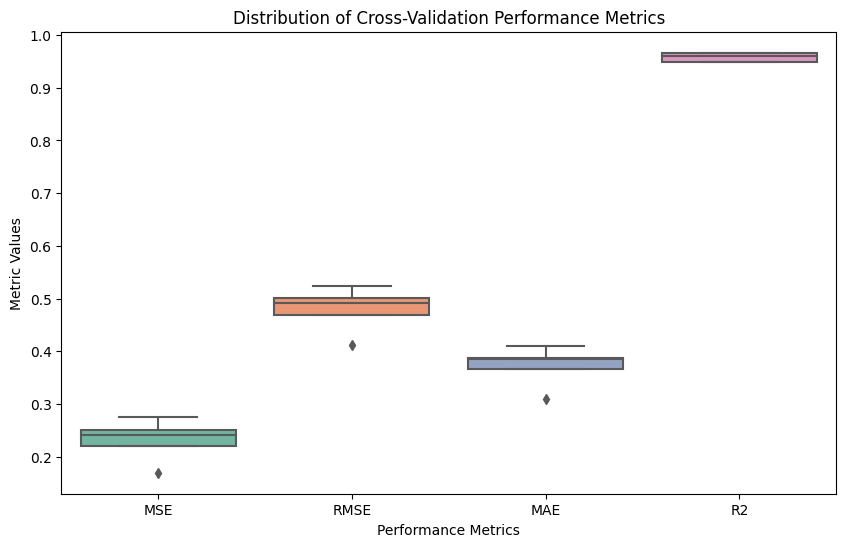

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

meanLinearRes, stdLinearRes = trainModel(lr, "Linear Regression")

### Finetuning

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
# dont use rmse for random forest

param_dist = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr = LinearRegression()

n_iter_search = 50

random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=n_iter_search, cv=5)


random_search.fit(xTrain, yTrain)

print("Best parameters found: ", random_search.best_params_)

# results = trainModel(lr, xTrain, xTest, yTrain, yTest, "Linear Regression")
# print(results)

Best parameters found:  {'normalize': True, 'fit_intercept': True}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Library/Frameworks/Python.framework/V

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Define your pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Define the hyperparameter space
param_dist = {
    'linearregression__fit_intercept': [True, False]
}

# Perform Random Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(xTrain, yTrain)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best parameters found:  {'linearregression__fit_intercept': True}


## Random Forest

Model: Random Forest Regressor
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.172594  0.965821   0.415444  0.312546
1  0.219851  0.965721   0.468883  0.366366
2  0.268740  0.961374   0.518401  0.401580
3  0.245871  0.947581   0.495854  0.389971
4  0.259093  0.946831   0.509012  0.392615

Mean of metrics:
test_MSE     0.233230
test_R2      0.957466
test_RMSE    0.481519
test_MAE     0.372615
dtype: float64

Standard Deviation of metrics:
test_MSE     0.038553
test_R2      0.009540
test_RMSE    0.041374
test_MAE     0.036012
dtype: float64


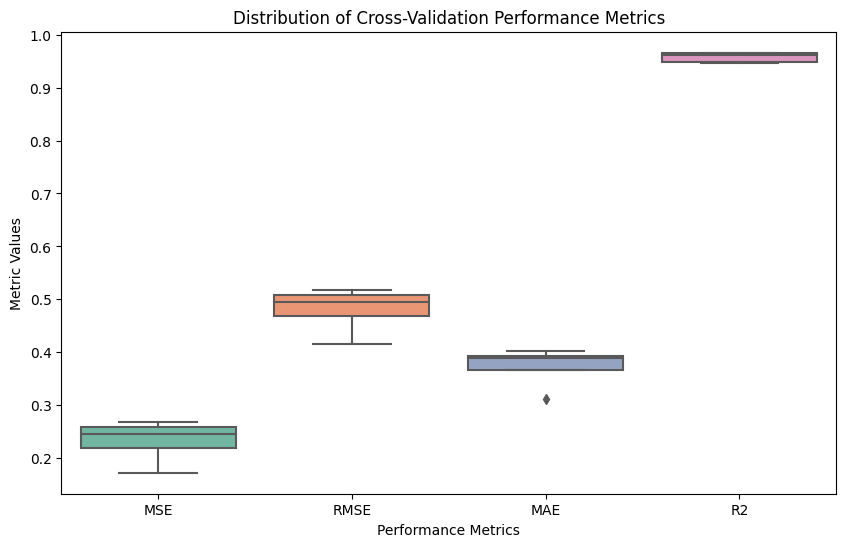

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 10, random_state=100)

meanRf, stdRf = trainModel(rf, "Random Forest Regressor")

# rf = RandomForestRegressor(max_depth = 2, random_state=100)

# trainModel(rf, "Random Forest Regressor")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# rf = RandomForestRegressor(max_depth = 2, random_state=100)
rf.fit(xTrain, yTrain)

results = trainModel(rf, "Random Forest Regressor")
print(results)

## Support Vector Regression (SVR)

Model: Support Vector Regression
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.170199  0.966295   0.412552  0.306509
1  0.212530  0.966862   0.461009  0.355679
2  0.262071  0.962333   0.511929  0.393412
3  0.238541  0.949144   0.488407  0.376752
4  0.270885  0.944411   0.520466  0.387934

Mean of metrics:
test_MSE     0.230845
test_R2      0.957809
test_RMSE    0.478873
test_MAE     0.364057
dtype: float64

Standard Deviation of metrics:
test_MSE     0.040776
test_R2      0.010357
test_RMSE    0.043678
test_MAE     0.035267
dtype: float64


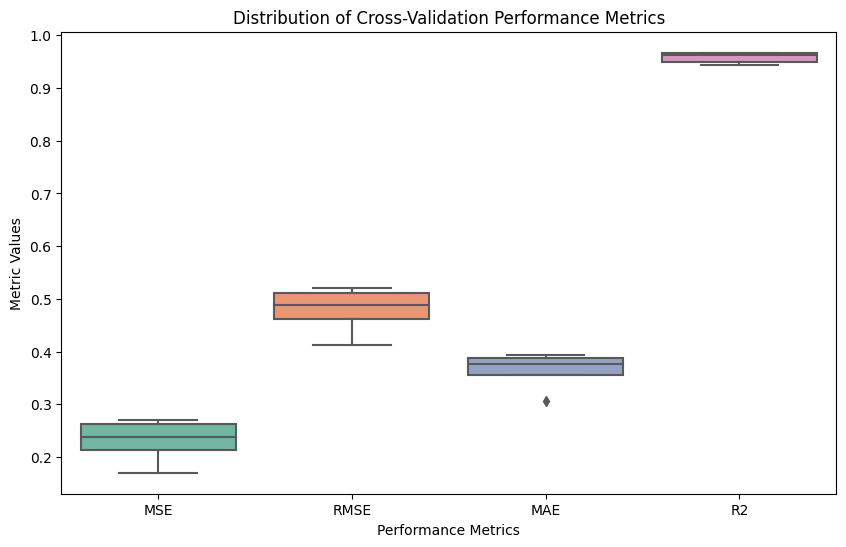

In [40]:
from sklearn.svm import SVR

svr = SVR()

meanSVR, stdSVR = trainModel(svr, "Support Vector Regression")



{'Linear Regression': [0.3718600811303904], 'Random Forest': [0.3726153990133593], 'SVR': [0.3640571330177263]}


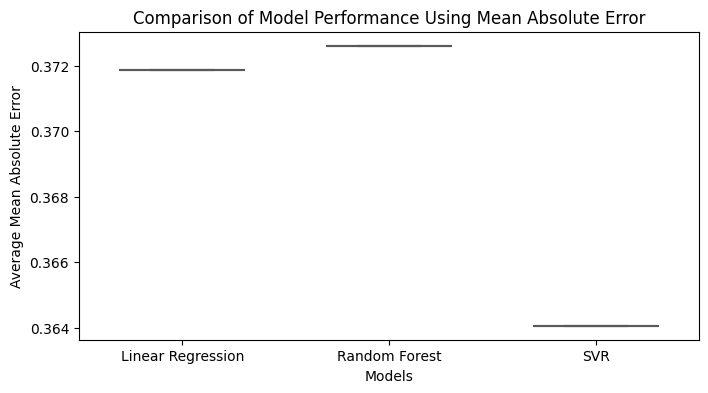

{'Linear Regression': [0.9579365230237796], 'Random Forest': [0.9574656145192799], 'SVR': [0.9578090583463155]}


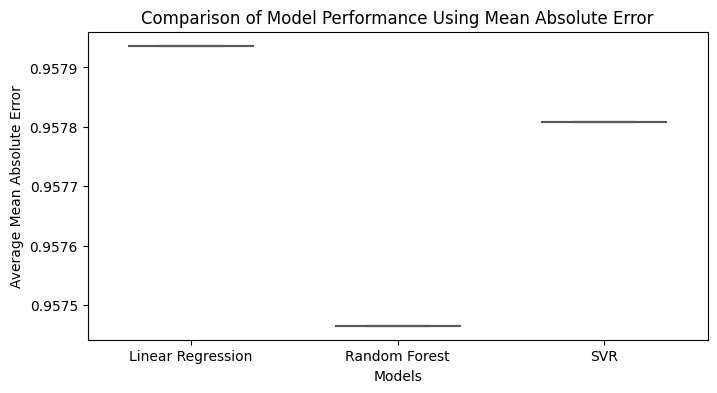

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plotResults = {
    'Linear Regression': [meanLinearRes['test_MAE']],
    'Random Forest': [meanRf['test_MAE']], 
    'SVR':[ meanSVR['test_MAE']]
}
print(plotResults)

plotResultsDf = pd.DataFrame(plotResults)   
plt.figure(figsize=(8, 4))
sns.boxplot(data=plotResultsDf, palette="Set2", width=0.6)
plt.title('Comparison of Model Performance Using Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('Average Mean Absolute Error')
plt.show()


plotResults = {
    'Linear Regression': [meanLinearRes['test_R2']],
    'Random Forest': [meanRf['test_R2']], 
    'SVR':[ meanSVR['test_R2']]
}
print(plotResults)

plotResultsDf = pd.DataFrame(plotResults)   
plt.figure(figsize=(8, 4))
sns.boxplot(data=plotResultsDf, palette="Set2", width=0.6)
plt.title('Comparison of Model Performance Using Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('Average Mean Absolute Error')
plt.show()


## Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

trainModel(gbr, "Gradient Boosting Regressor")


Model: Gradient Boosting Regressor
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.211161  0.963217   0.459523  0.354036
1  0.216311  0.962959   0.465093  0.356814
2  0.217318  0.964381   0.466174  0.361169
3  0.206791  0.964672   0.454742  0.353535
4  0.209032  0.964704   0.457200  0.352852

Mean of metrics:
test_MSE     0.212122
test_R2      0.963987
test_RMSE    0.460546
test_MAE     0.355681
dtype: float64

Standard Deviation of metrics:
test_MSE     0.004567
test_R2      0.000835
test_RMSE    0.004957
test_MAE     0.003417
dtype: float64


## XGBoost

In [16]:
# import sys
# !{sys.executable} -m pip install xgboost

In [26]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

trainModel(gbr,  "XGB Regressor")


Model: XGB Regressor
Cross-validation results (each fold):
   test_MSE   test_R2  test_RMSE  test_MAE
0  0.211095  0.963229   0.459450  0.354020
1  0.216247  0.962970   0.465024  0.356774
2  0.217283  0.964387   0.466137  0.361164
3  0.206789  0.964672   0.454740  0.353539
4  0.209033  0.964703   0.457201  0.352860

Mean of metrics:
test_MSE     0.212089
test_R2      0.963992
test_RMSE    0.460510
test_MAE     0.355671
dtype: float64

Standard Deviation of metrics:
test_MSE     0.004547
test_R2      0.000829
test_RMSE    0.004934
test_MAE     0.003412
dtype: float64


# Model Comparison

# Model for Time Created

In [21]:
X = df[['monthSin', 'monthCos', 'hourSin', 'hourCos', 'weekdaySin', 'weekdayCos']]
y = df['nShares', 'nComments']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state=100)
rf.fit(xTrain, yTrain)

results = trainModel(rf, xTrain, xTest, yTrain, yTest, "Random Forest Regressor")
print(results)

--Random Forest Regressor--
Training
                    Method       MSE        R2     RMSE       MAE
0  Random Forest Regressor  5.170395  0.043722  2.27385  1.821442
Testing
                    Method       MSE        R2      RMSE       MAE
0  Random Forest Regressor  5.134233  0.044435  2.265885  1.830062



In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(xTrain, yTrain)

results = trainModel(rf, xTrain, xTest, yTrain, yTest, "Random Forest Regressor")
print(results)

--Random Forest Regressor--
Training
                    Method       MSE        R2      RMSE       MAE
0  Random Forest Regressor  4.753945  0.120745  2.180354  1.735114
Testing
                    Method       MSE       R2      RMSE       MAE
0  Random Forest Regressor  5.230222  0.02657  2.286968  1.832596



## Retraining the Model with more Features

In [24]:
X = df[['monthSin', 'monthCos', 'hourSin', 'hourCos', 'weekdaySin', 'weekdayCos', 'nLikes']]
y = df['nComments']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(xTrain, yTrain)

results = trainModel(rf, xTrain, xTest, yTrain, yTest, "Random Forest Regressor")
print(results)

--Random Forest Regressor--
Training
                    Method       MSE        R2      RMSE       MAE
0  Random Forest Regressor  0.170534  0.968459  0.412958  0.281065
Testing
                    Method       MSE        R2     RMSE       MAE
0  Random Forest Regressor  1.154507  0.785127  1.07448  0.758068



In [27]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Feature and target definition
X = df[['monthSin', 'monthCos', 'hourSin', 'hourCos', 'weekdaySin', 'weekdayCos', 'nLikes']]
y = df['nComments']

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Define custom scoring functions
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# Perform five-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {key: cross_val_score(rf, X, y, cv=kf, scoring=scoring[key]) for key in scoring}

# Calculate and print average metrics
for metric_name, scores in cv_results.items():
    print(f"Average {metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

rf.fit(X, y)
y_pred = rf.predict(X)

overall_metrics = {
    'MSE': mean_squared_error(y, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
    'MAE': mean_absolute_error(y, y_pred),
    'R2': r2_score(y, y_pred)
}

print("\nOverall Metrics on Full Dataset:")
for metric_name, value in overall_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Average MSE: 1.1773 (+/- 0.0429)
Average RMSE: 1.0848 (+/- 0.0199)
Average MAE: 0.7513 (+/- 0.0039)
Average R2: 0.7820 (+/- 0.0073)

Overall Metrics on Full Dataset:
MSE: 0.1687
RMSE: 0.4107
MAE: 0.2825
R2: 0.9688


In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Feature and target definition
X = df[['monthSin', 'monthCos', 'hourSin', 'hourCos', 'nComments', 'nLikes']]
y = df[['weekdaySin', 'weekdayCos']]

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Define custom scoring functions
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score)
}

# Perform five-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {key: cross_val_score(rf, X, y, cv=kf, scoring=scoring[key]) for key in scoring}

# Calculate and print average metrics
for metric_name, scores in cv_results.items():
    print(f"Average {metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

rf.fit(X, y)
y_pred = rf.predict(X)

overall_metrics = {
    'MSE': mean_squared_error(y, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
    'MAE': mean_absolute_error(y, y_pred),
    'R2': r2_score(y, y_pred)
}

print("\nOverall Metrics on Full Dataset:")
for metric_name, value in overall_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Average MSE: 0.5457 (+/- 0.0019)
Average RMSE: 0.7387 (+/- 0.0013)
Average MAE: 0.6421 (+/- 0.0013)
Average R2: -0.0930 (+/- 0.0043)

Overall Metrics on Full Dataset:
MSE: 0.0763
RMSE: 0.2762
MAE: 0.2371
R2: 0.8472


In [ ]:
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=100)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(xTrain, yTrain)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_rf = grid_search.best_estimator_
best_rf.fit(xTrain, yTrain)

# Evaluate the model
y_train_pred = best_rf.predict(xTrain)
y_test_pred = best_rf.predict(xTest)

# Calculate metrics
metrics = {
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error,
    'R2': r2_score
}

# Print training and testing metrics
for name, metric in metrics.items():
    print(f"Training {name}: {metric(yTrain, y_train_pred)}")
    print(f"Testing {name}: {metric(yTest, y_test_pred)}")

# Feature importance
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))